In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf


In [11]:
yf.pdr_override()
y_symbol = ['AMZN']
startdate = '2010-01-01'
enddate = '2023-1-10'
data = pdr.get_data_yahoo(y_symbol, start=startdate, end=enddate)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


In [12]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000
2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100
2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800
2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400
2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100


In [20]:
data=data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
1,2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2,2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
3,2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
4,2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


In [14]:
# Reset index if 'Date' is the index to make it a column
if isinstance(data.index, pd.DatetimeIndex):
    data.reset_index(inplace=True)

# Drop columns if they exist
columns_to_drop = ['Date', 'Adj Close']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data = data.drop(columns=columns_to_drop)

# Display the first few rows to confirm
print(data.head())


     Open    High     Low   Close     Volume
0  6.8125  6.8305  6.6570  6.6950  151998000
1  6.6715  6.7740  6.5905  6.7345  177038000
2  6.7300  6.7365  6.5825  6.6125  143576000
3  6.6005  6.6160  6.4400  6.5000  220604000
4  6.5280  6.6840  6.4515  6.6760  196610000


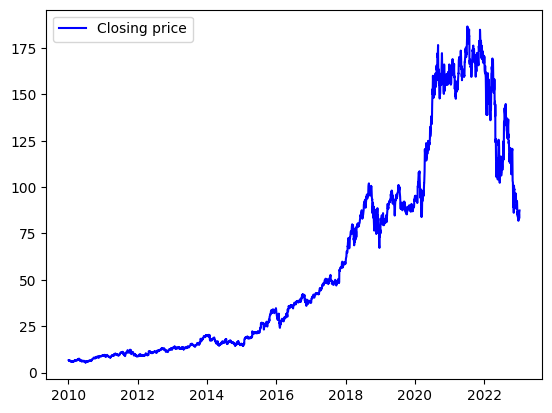

In [13]:
plt.plot(data.Close,'b',label='Closing price')
plt.legend()
plt.show()

In [15]:
data


,Open,High,Low,Close,Volume
0,6.812500,6.830500,6.657000,6.695000,151998000
1,6.671500,6.774000,6.590500,6.734500,177038000
2,6.730000,6.736500,6.582500,6.612500,143576000
3,6.600500,6.616000,6.440000,6.500000,220604000
4,6.528000,6.684000,6.451500,6.676000,196610000
...,...,...,...,...,...
3272,85.459999,86.959999,84.209999,85.820000,76706000
3273,86.550003,86.980003,83.360001,85.139999,68885100
3274,85.330002,85.419998,83.070000,83.120003,67930800
3275,83.029999,86.400002,81.430000,86.080002,83303400


In [16]:
ma100=data.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3272    109.4531
3273    108.8981
3274    108.2938
3275    107.7228
3276    107.1486
Name: Close, Length: 3277, dtype: float64

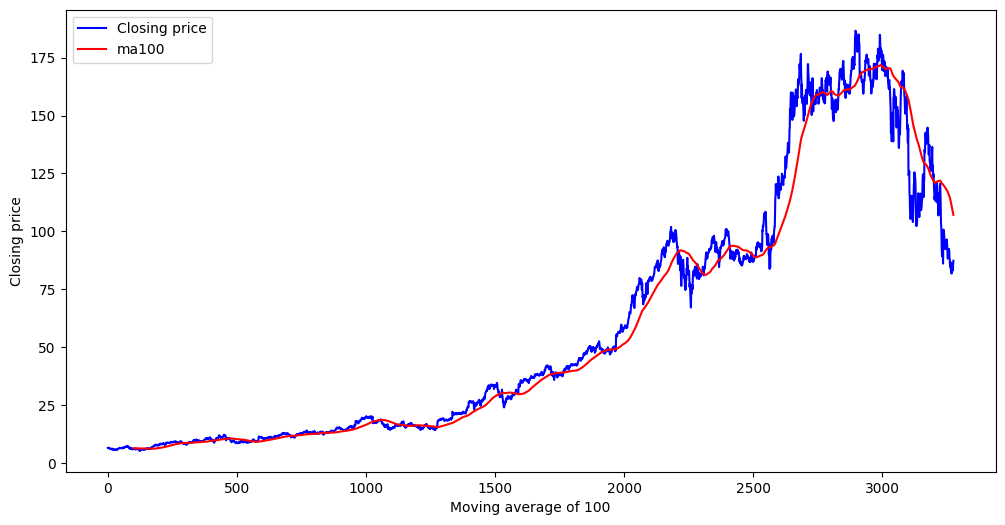

In [17]:
plt.figure(figsize = (12,6))
plt.plot(data.Close,'b',label='Closing price')
plt.plot(ma100,'r', label='ma100')
plt.ylabel('Closing price')
plt.xlabel('Moving average of 100')
plt.legend()
plt.show()

In [18]:
ma200=data.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3272    119.018645
3273    118.638093
3274    118.246235
3275    117.852190
3276    117.471950
Name: Close, Length: 3277, dtype: float64

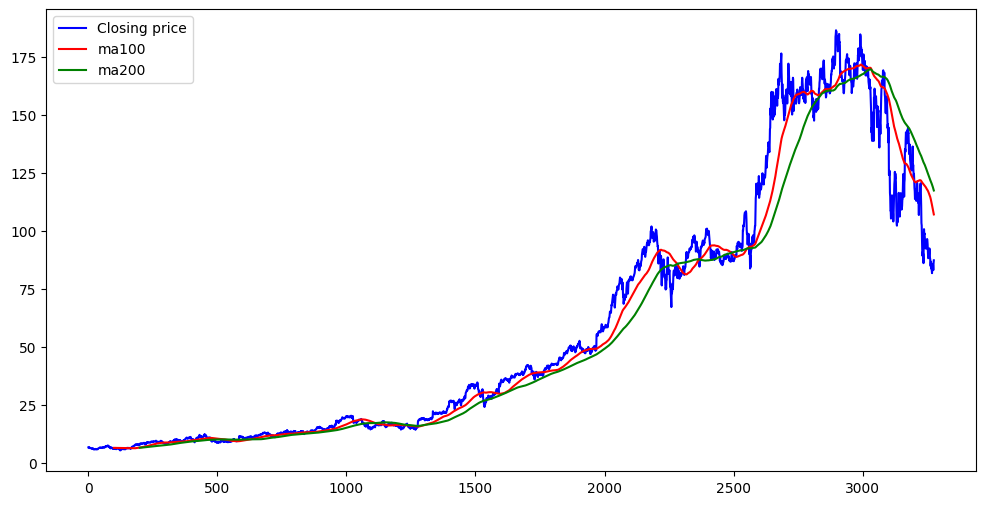

In [19]:
plt.figure(figsize = (12,6))
plt.plot(data.Close,'b',label='Closing price')
plt.plot(ma100,'r', label='ma100')
plt.plot(ma200,'g', label='ma200')
plt.legend()
plt.show()

In [20]:
data.shape


(3277, 5)

In [21]:
data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing=pd.DataFrame(data['Close'][int(len(data)*0.70):int(len(data))])

In [22]:
print(data_training.shape)
print(data_testing.shape)

(2293, 1)
(984, 1)


In [23]:
data_training.head()


,Close
0,6.6950
1,6.7345
2,6.6125
3,6.5000
4,6.6760


In [24]:
data_testing.head()


,Close
2293,82.000000
2294,81.132500
2295,80.397499
2296,81.378998
2297,81.105003


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array =scaler.fit_transform(data_training)
data_training_array

array([[0.01309752],
       [0.01350665],
       [0.012243  ],
       ...,
       [0.76627999],
       [0.76771973],
       [0.79206583]])

In [27]:
data_training_array.shape


(2293, 1)

In [28]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
#convert to numpy array so as to be able to provide this data to our LSTM algorithm
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
x_train.shape


(2193, 100, 1)

In [30]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [31]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train,epochs=50)


Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 31s 223ms/step - loss: 0.0430
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - loss: 0.0041
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - loss: 0.0039
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - loss: 0.0032
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 258ms/step - loss: 0.0033
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - loss: 0.0034
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 252ms/step - loss: 0.0025
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 251ms/step - loss: 0.0038
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 258ms/step - loss: 0.0031
Epoch 10/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 248ms/step - loss: 0.0029
Epoch 11/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 250ms/step - loss: 0.0029
Epoch 12/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 251ms/step - loss: 0.0025
Epoch 13/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 244ms/step - loss: 0.0026
Epoch 14/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - loss: 0.0020
Epoch 15/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 

In [39]:
model.save('keras_model.h5')


In [40]:
data_testing.head()


,Close
2293,82.000000
2294,81.132500
2295,80.397499
2296,81.378998
2297,81.105003


In [42]:
data_testing.head()


,Close
2293,82.000000
2294,81.132500
2295,80.397499
2296,81.378998
2297,81.105003


In [ ]:
past_100_days = data_training.tail(100)



In [57]:

final_data=past_100_days.append(data_testing, ignore_index=True)



AttributeError: 'DataFrame' object has no attribute 'append'

In [58]:
final_data.head()


NameError: name 'final_data' is not defined